# 📝 kaggle survey 2020

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

plt.style.use('seaborn-whitegrid')

In [3]:
data = pd.read_csv("/content/drive/MyDrive/kaggle_survey_2020_responses.csv", low_memory=False)

## 👀 데이터 살펴보기

In [4]:
data.shape

(20037, 355)

In [5]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

Q1부터 Q6까지는 답변이 하나씩 들어있지만, Q7부터 보면 선택할 수 있는 항목이 여러개 존재하는 것을 볼 수 있습니다. 따라서 싱글 답변과 멀티 답변을 구분하여 분석해야 합니다.  

NaN은 선택하지 않음을 의미합니다.

###질문과 답변 분리하기

In [8]:
question = data.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [9]:
answer = data.drop([0])
answer.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ❗ 함수 정의

분석을 위해 필요한 함수를 정의하여 사용하도록 하겠습니다.  

싱글 답변과 멀티 답변을 분리하여 만들도록 하겠습니다.



#### ✏️ 질문 반환 그래프

그래프를 그릴 때 위에 질문을 제목으로 넣어주면 좀 더 보기 좋은 시각화가 될 것 같습니다.   

질문을 반환해주는 함수도 따로 정의를 하도록 하겠습니다.

In [23]:
def question_title_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0].split("-")[0]
    return q_no

question_title_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

####  📊 싱글 답변 그래프

In [111]:
def plot_sigle_qno(qno, fsize=(10,6), order=None): #기본값으로 지정하는 부분

  if not order:
    order = answer[qno].value_counts().index

  plt.figure(figsize=fsize) 
  sns.countplot(data=answer,y=qno, 
                order=order, palette='viridis').set_title(question[qno])

이 함수는 답변이 하나인 싱글 답변에 관해 그래프를 그려주는 함수입니다. fsize는 기본값을 가지도록 하고 원하는 사이즈로 변경 가능하게 설정하였습니다.

####  📊 멀티 답변 그래프

In [11]:
df_answer = answer.filter(regex="Q7")
answer_desc = df_answer.describe()

In [12]:
answer_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [15]:
def table_multiple_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[["top","count"]].T.set_index("top")
  answer_count = answer_count.sort_values(by='count',ascending=False)
  return answer_count
  
table_multiple_qno("Q7")

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


멀티 답변은 싱글 답변과 달리 좀 더 복잡한 작업이 필요합니다.  

멀티 답변은 컬럼별로 한 종류의 데이터만 담겨 있기 때문에 decribe를 사용하여 빈도를 반환하면 해당하는 수를 계산할 수 있습니다.  

그 후 set_index를 사용하여 우리가 원하는 위 테이블의 형태로 만들어 줍니다.

In [188]:
def plot_multiple_qno(qno):
  multiple_choice_answer = table_multiple_qno(qno)

  plt.figure(figsize=(10,6))
  sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index,
              x="count", palette="YlOrRd_r").set_title(question_title_qno(qno))

그 다음 그래프를 그려주는 함수를 정의하면 우리가 원하는 형태로 그래프를 그릴 수 있습니다.

최종적으로 싱글과 멀티를 구분하도록 설정하여 자동으로 그래프로 그리는 함수를 정의하도록 하겠습니다.

####  📊 싱글과 멀티를 구분하여 자동으로 그래프를 그려주는 함수

In [91]:
def plot_by_qno(qno):
  if qno in question.index:
    plot_sigle_qno(qno)
  else:
    plot_multiple_qno(qno)

## 💻 분석을 통한 인사이트 찾기

이제 본격적으로 분석을 해보도록 하겠습니다. 분석은 질문별로 분석을 해보며 해석을 통해 인사이트를 찾아보도록 하겠습니다.

#### Q1 What is your age (# years)?

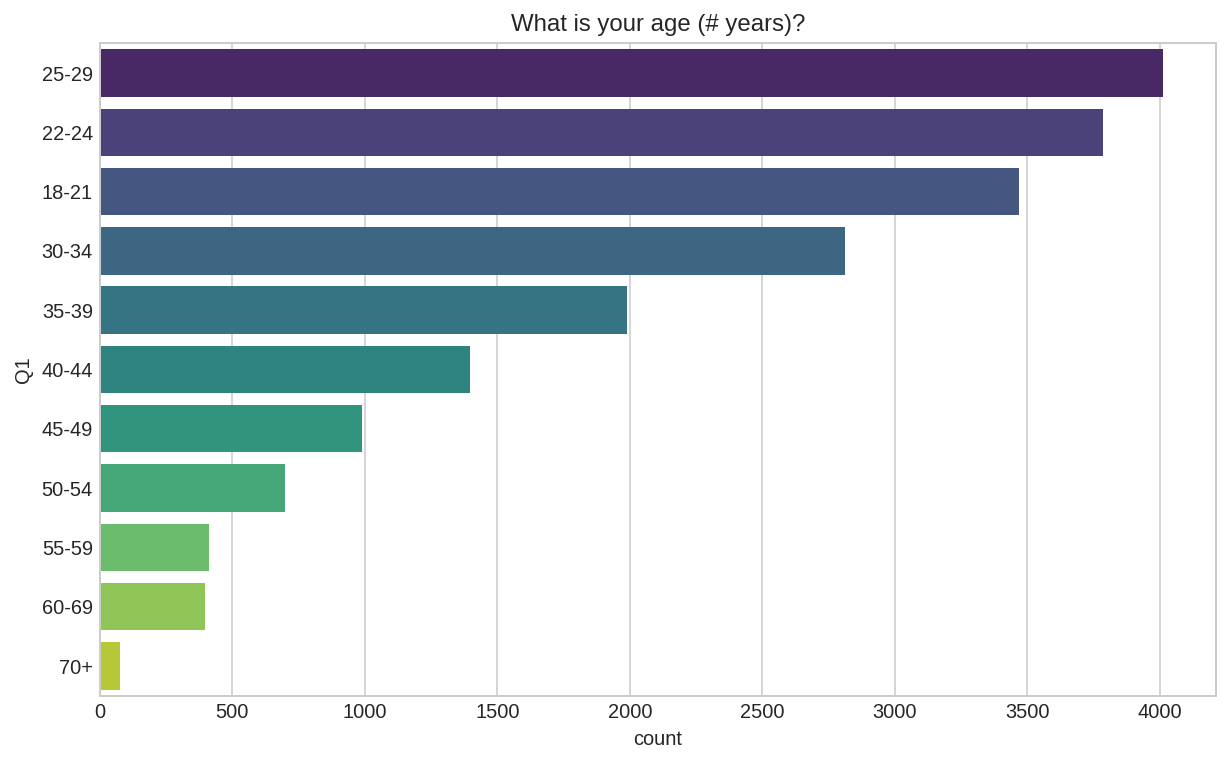

In [95]:
plot_by_qno("Q1")

Q1은 캐글 사용자들의 연렁대에 관한 질문입니다.  

그래프를 보면 주로 20대가 많은 것을 알 수 있습니다. 70대 이상도 캐글을 사용하고 계시다니 정말 그 열정을 존경하게 되는 결과였다.

#### Q2 What is your gender? - Selected Choice

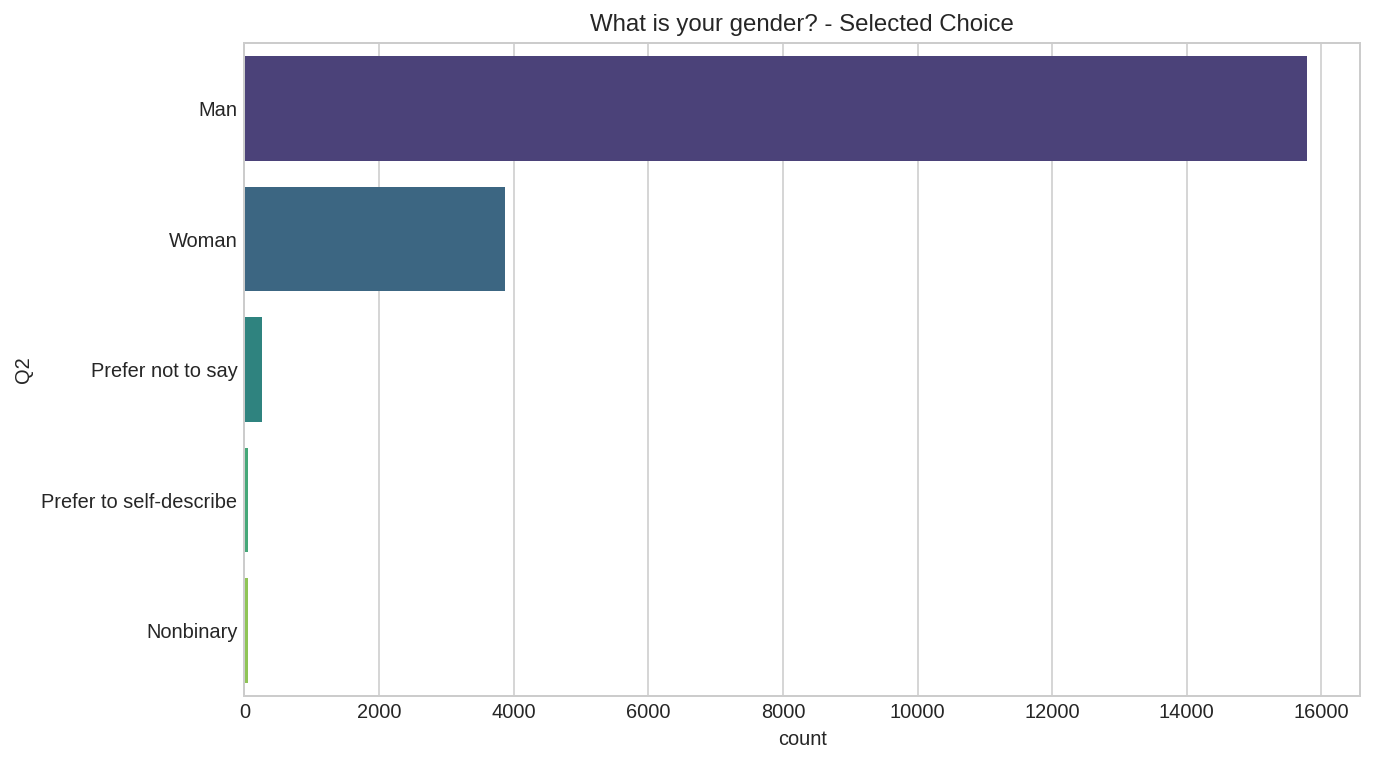

In [113]:
plot_by_qno("Q2")

Q2는 캐글 사용자들의 성별에 관한 질문입니다.  

남성이 여성에 비해 약 4배정도 많다는 결과가 나왔습니다. 생각보다 남성 비율이 더 많은 것 같습니다.

#### Q In which country do you currently reside?

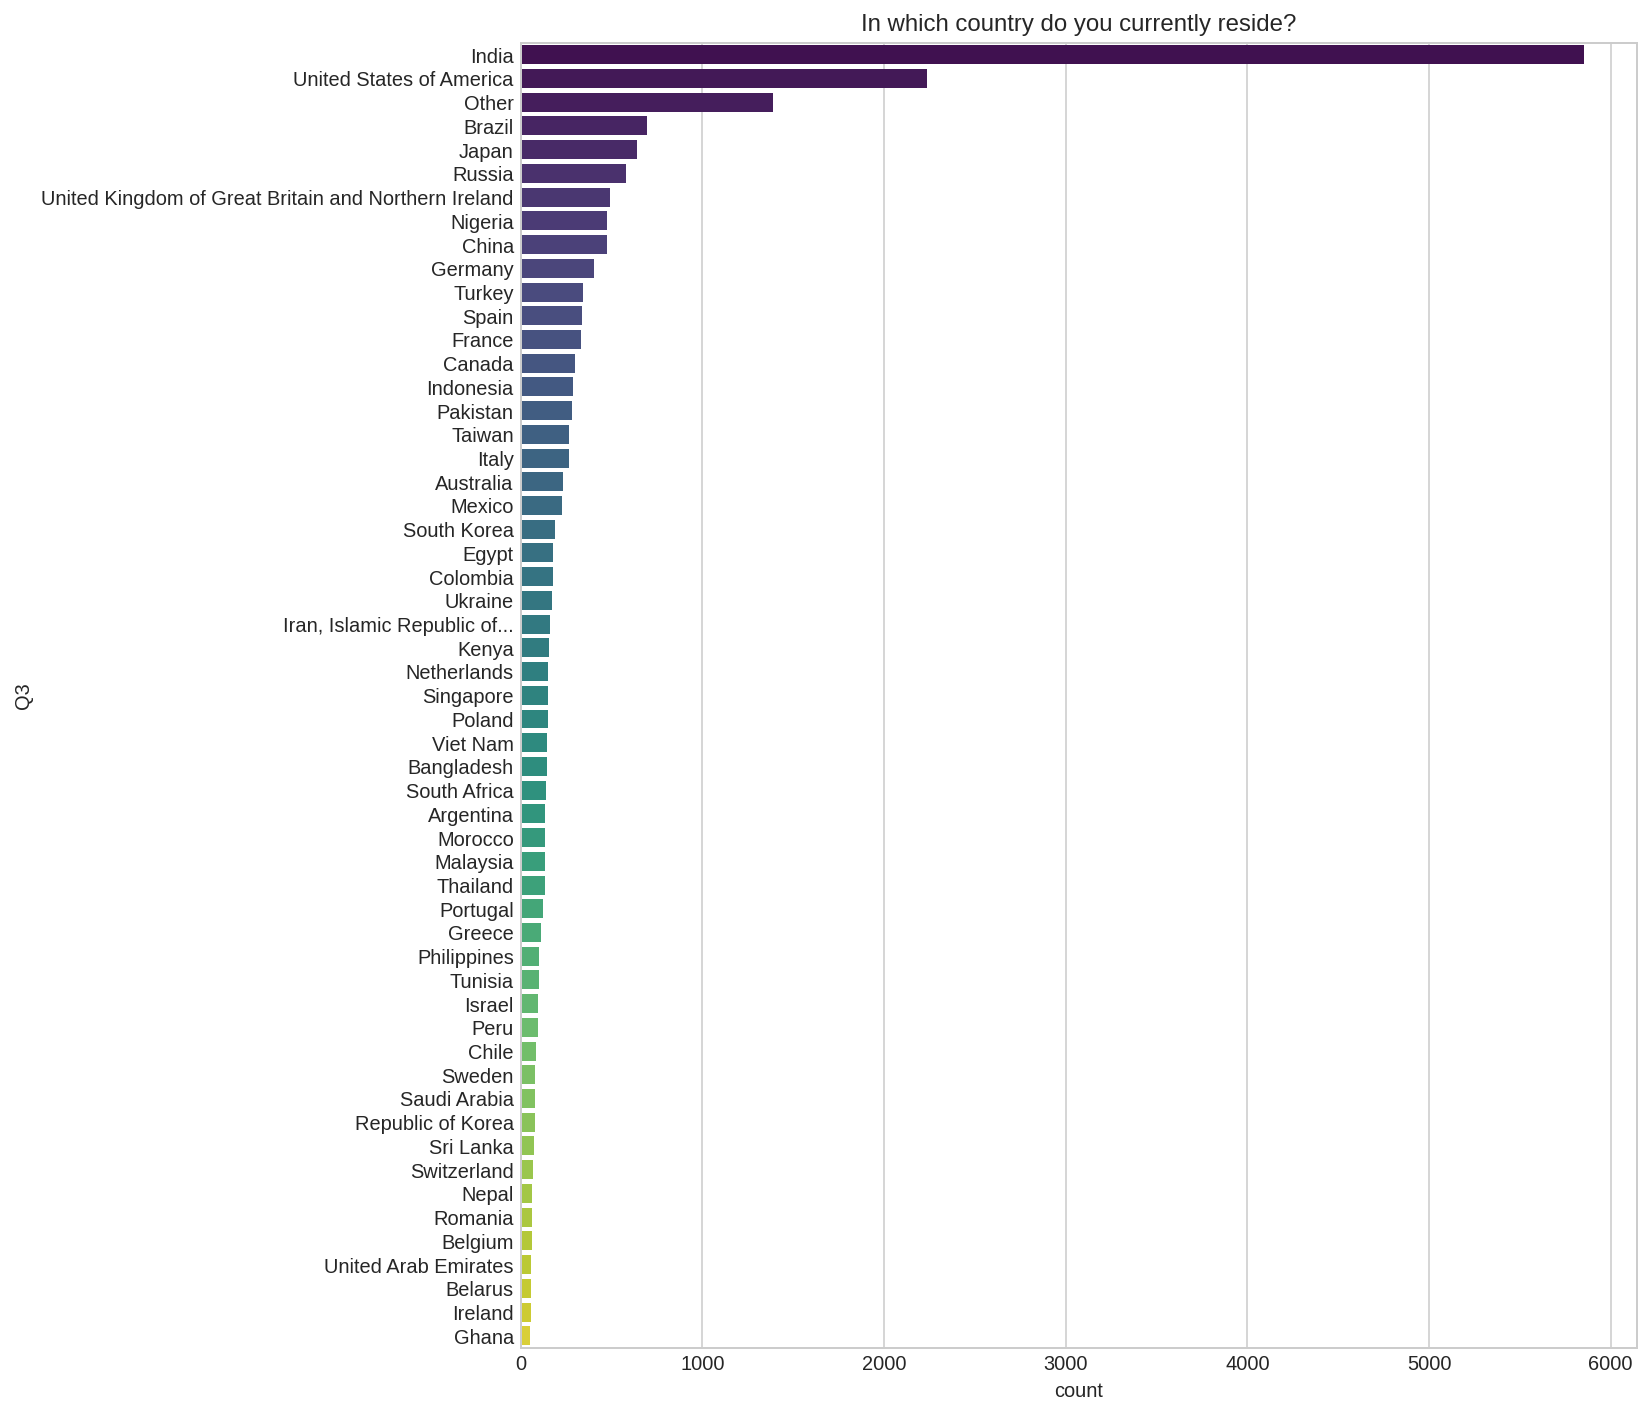

In [114]:
plot_sigle_qno("Q3", fsize=(10,12))

Q3는 캐글 사용자들의 국가에 관한 질문이다. 인도 사용자가 굉장히 많아 의외의 결과가 나왔다. USA가 1등일 줄 알았는데 USA는 2등을 차지하였다.  

우리나라는 중간정도 순위에 있었다. 

##### Q What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

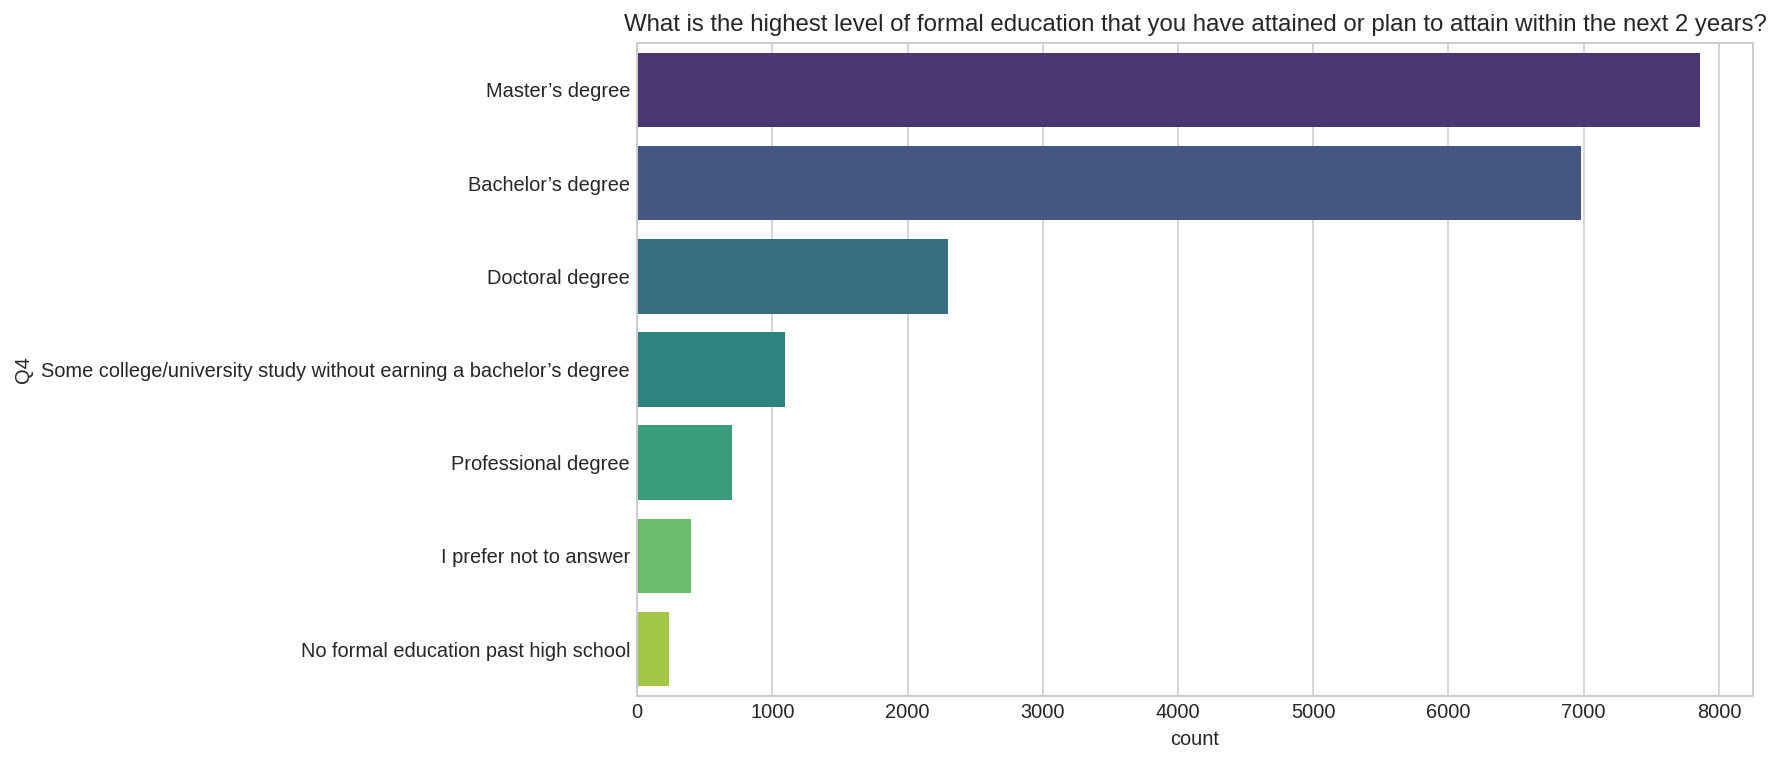

In [116]:
plot_by_qno("Q4")

Q4는 캐글 사용자의 학위에 관한 질문이다.   

예상했던 대로 석사 출신들이 많이 존재했다. 그 다음으로는 석사, 박사 등이 있었다.

#### Q5 Select the title most similar to your current role (or most recent title if retired): - Selected Choice

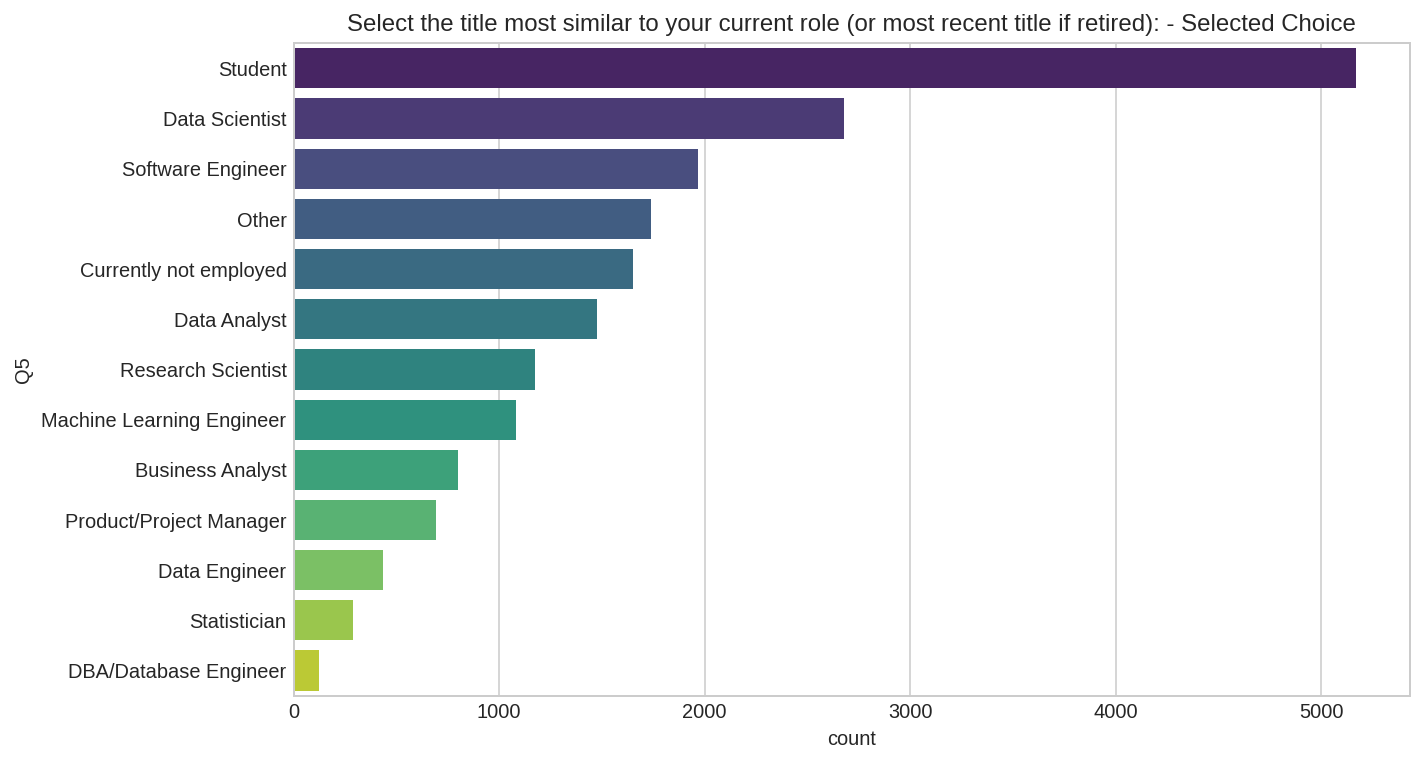

In [118]:
plot_by_qno("Q5")

Q5는 캐글 사용자의 직무에 관한 질문이다. 

역시 학생들이 가장 많았다. 그 뒤로는 데이터 사이언티스트, 소트프 엔지니어 등이 있었다. 

#### Q6 For how many years have you been writing code and/or programming?

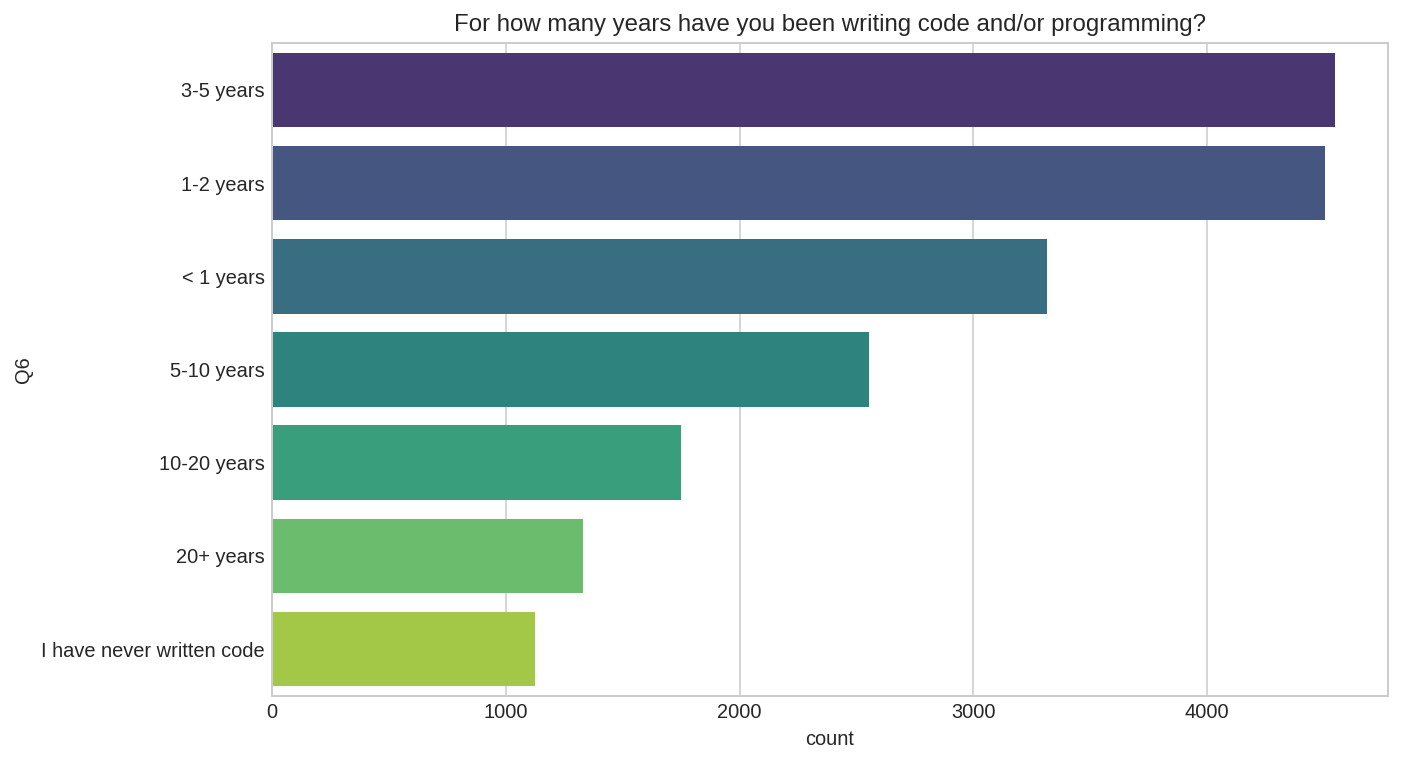

In [151]:
plot_by_qno("Q6")

Q6은 캐글 사용자의 코드 및 프로그램 사용기간에 관한 질문이다.  

주로 1~5년 사이의 사용자들이 많았다.

In [ ]:
 데이터사이언티스트, 소트으웨어 엔지니어,

#### Q What programming languages do you use on a regular basis? (Select all that apply) 

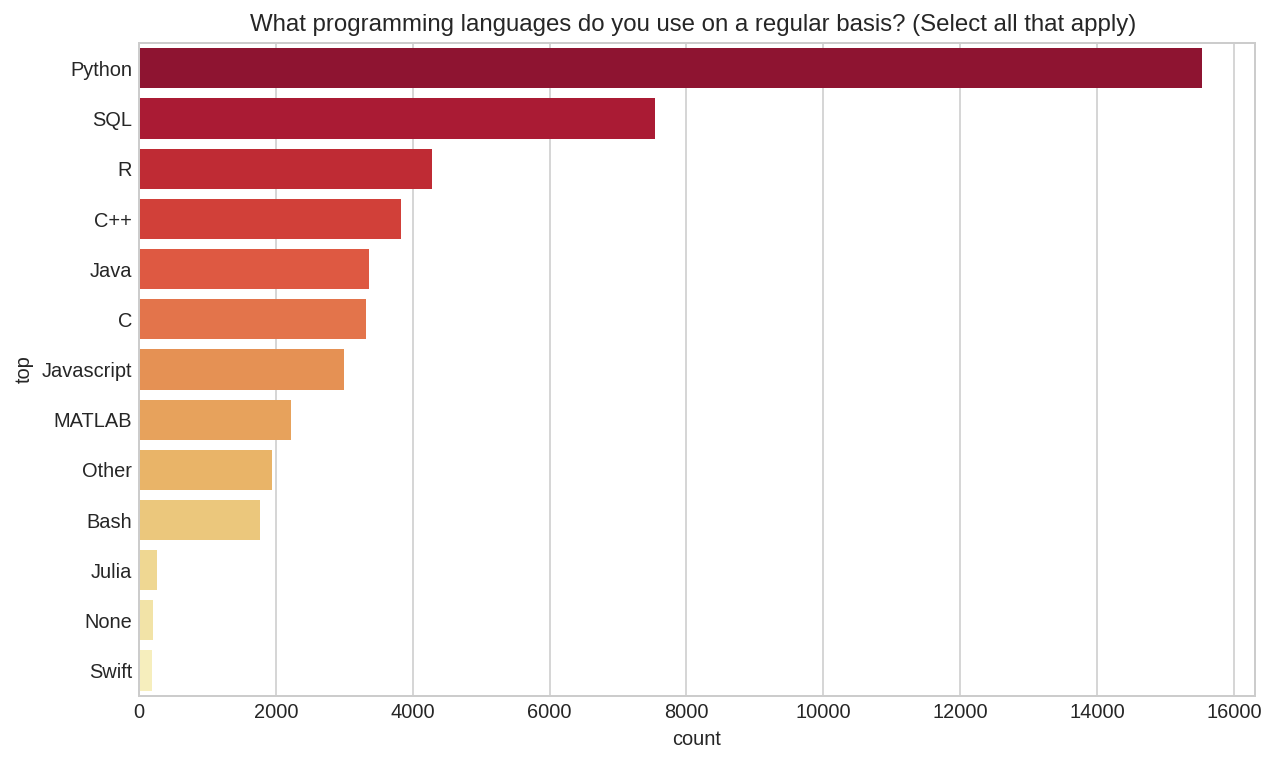

In [195]:
plot_by_qno("Q7")

Q7은 캐글 사용자들이 주로 사용하는 프로그래밍 언어에 관한 질문이다.  

예상대로 파이썬이 가장 많았고 다음으로 R이 많을 줄 알았는데 SQL이 2위를 차지했다.

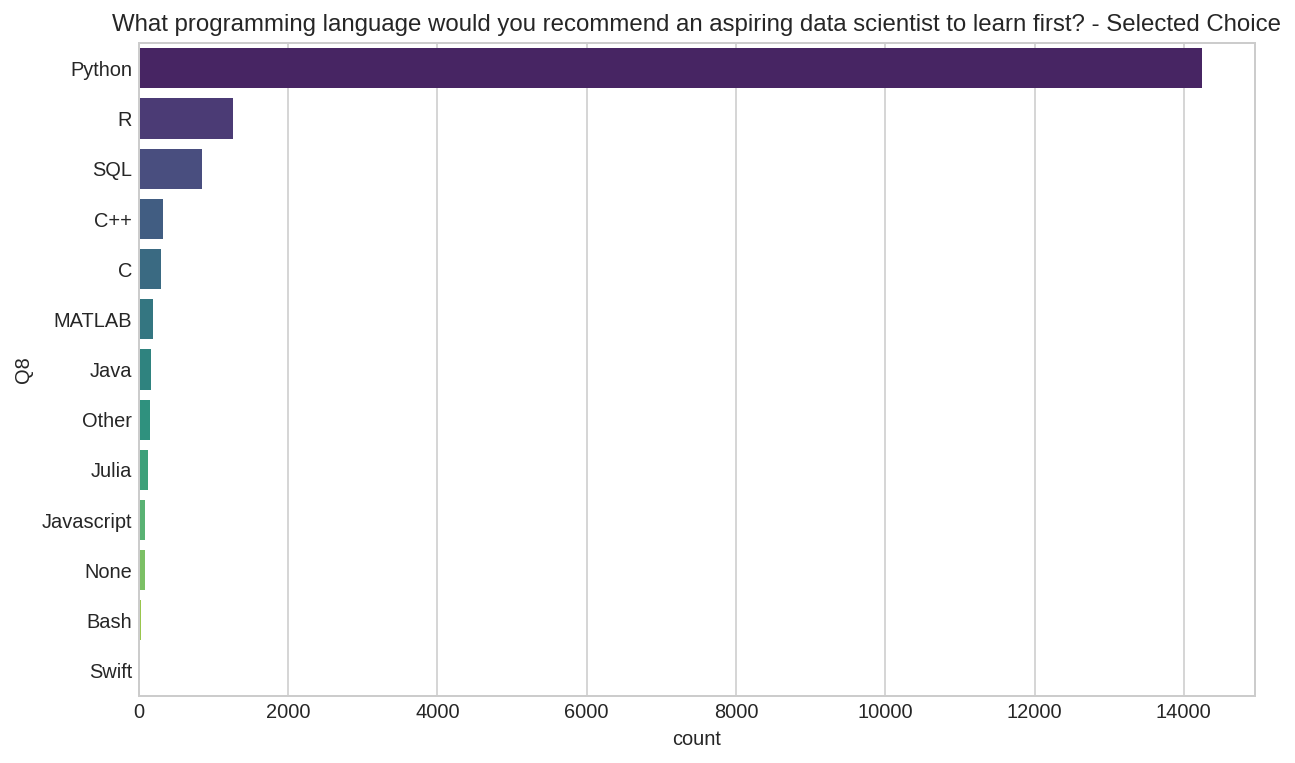

In [196]:
plot_by_qno("Q8")

Q8은 데이터 과학을 배우는데 추천하는 언어에 관한 질문이다.  

역시나 파이썬이 압도적으로 많았다.

#### Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) 


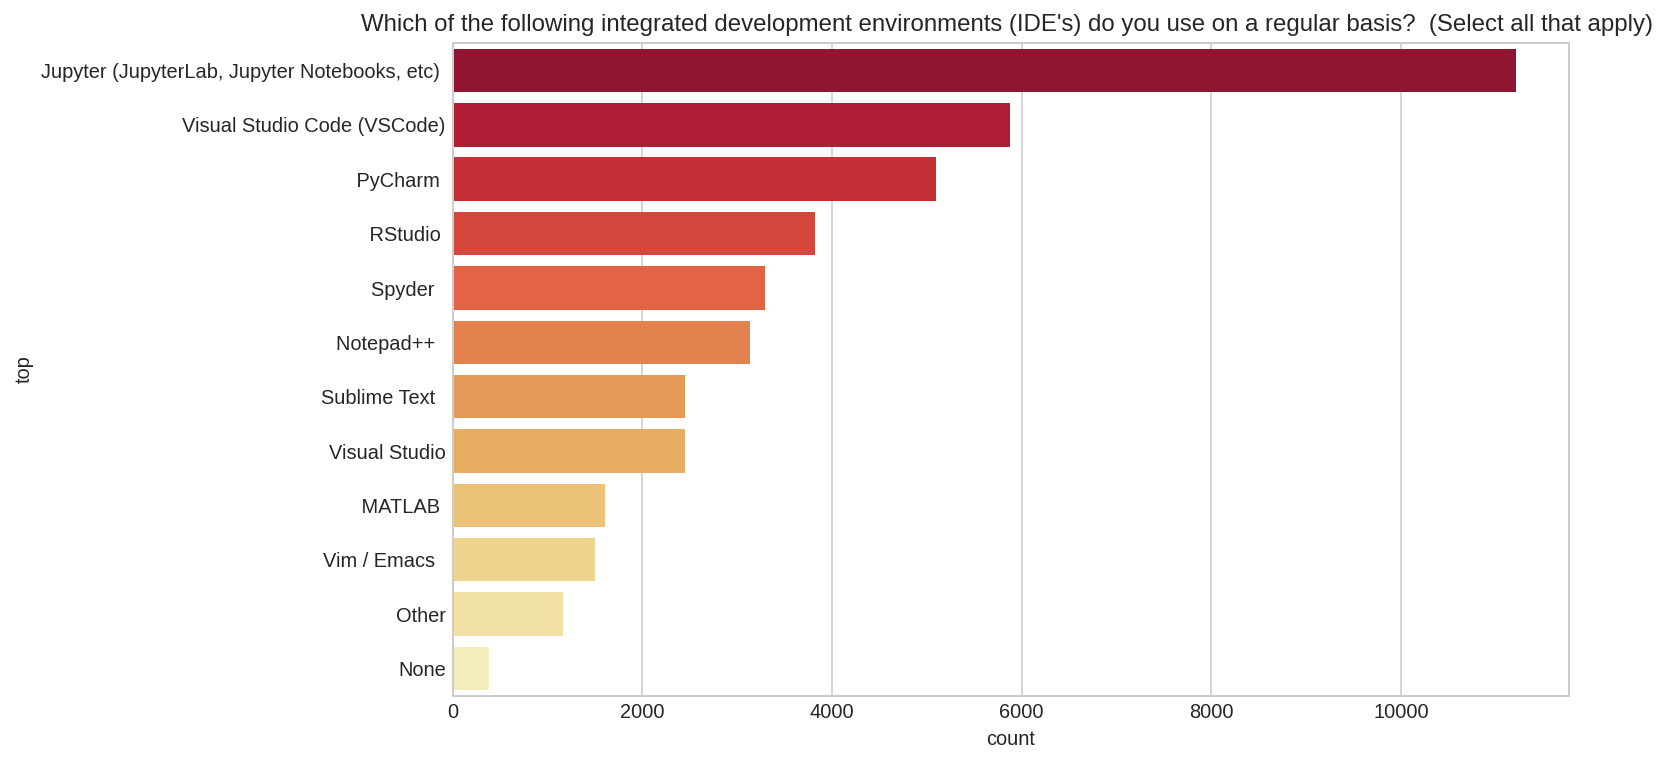

In [200]:
plot_by_qno("Q9")

Q8은 IDE 즉 개발 환경에 관한 질문이다.  

역시 주피터 노트북이 많았고 다음으로 VSCode, 파이참, R등이 있었다.

#### Q10 Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) 

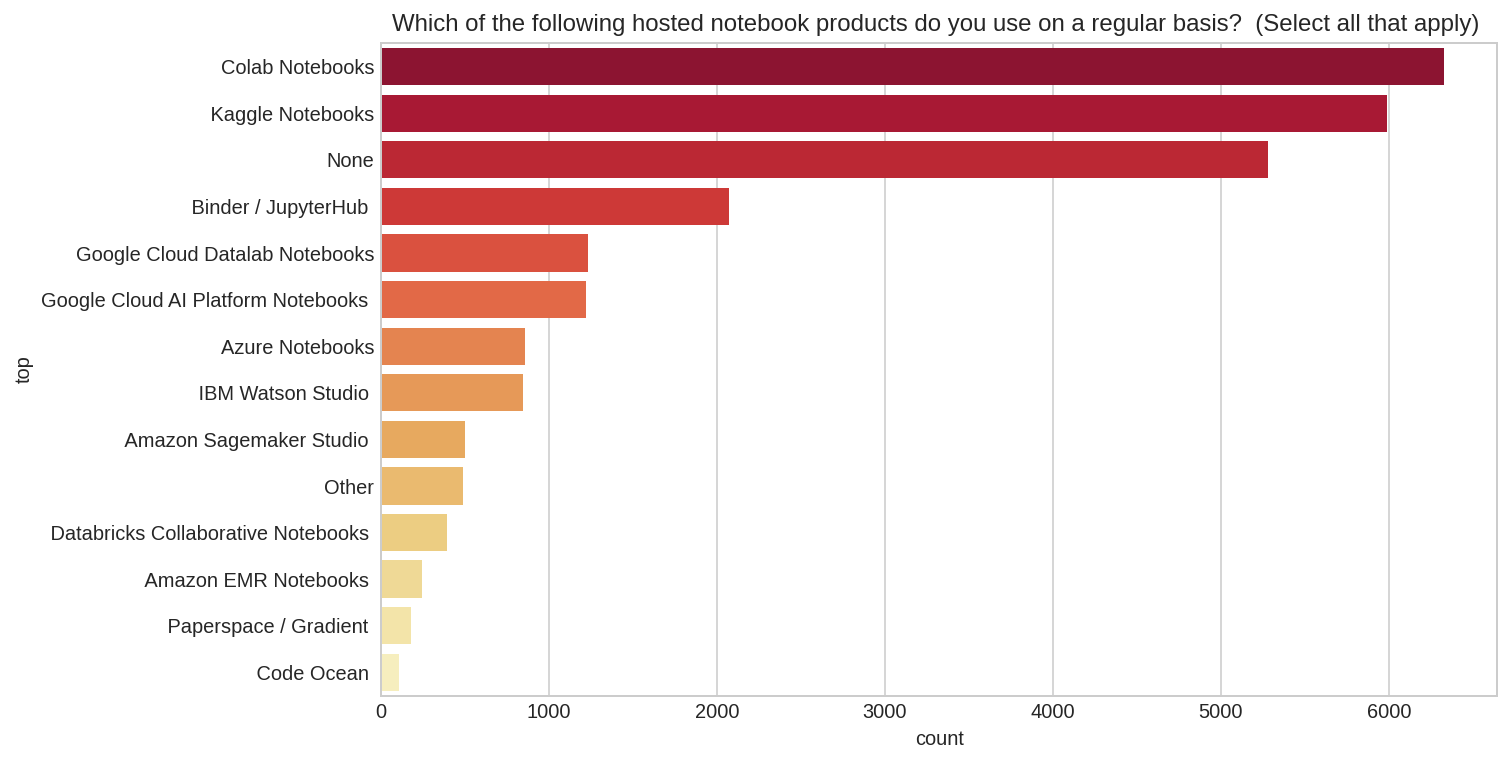

In [202]:
plot_by_qno("Q10")

Q10은 호스팅된 노트북 중 어떤 것을 사용하는지에 관한 질문이다.  

코랩이 가장 많았고, 다음으로 캐글 노트북등이 있었다. 아무래도 캐글 사용자들을 대상으로 설문을 진행했기 때문에 이러한 결과가 나온 것 같다.

#### Q11 What type of computing platform do you use most often for your data science projects? - Selected Choice

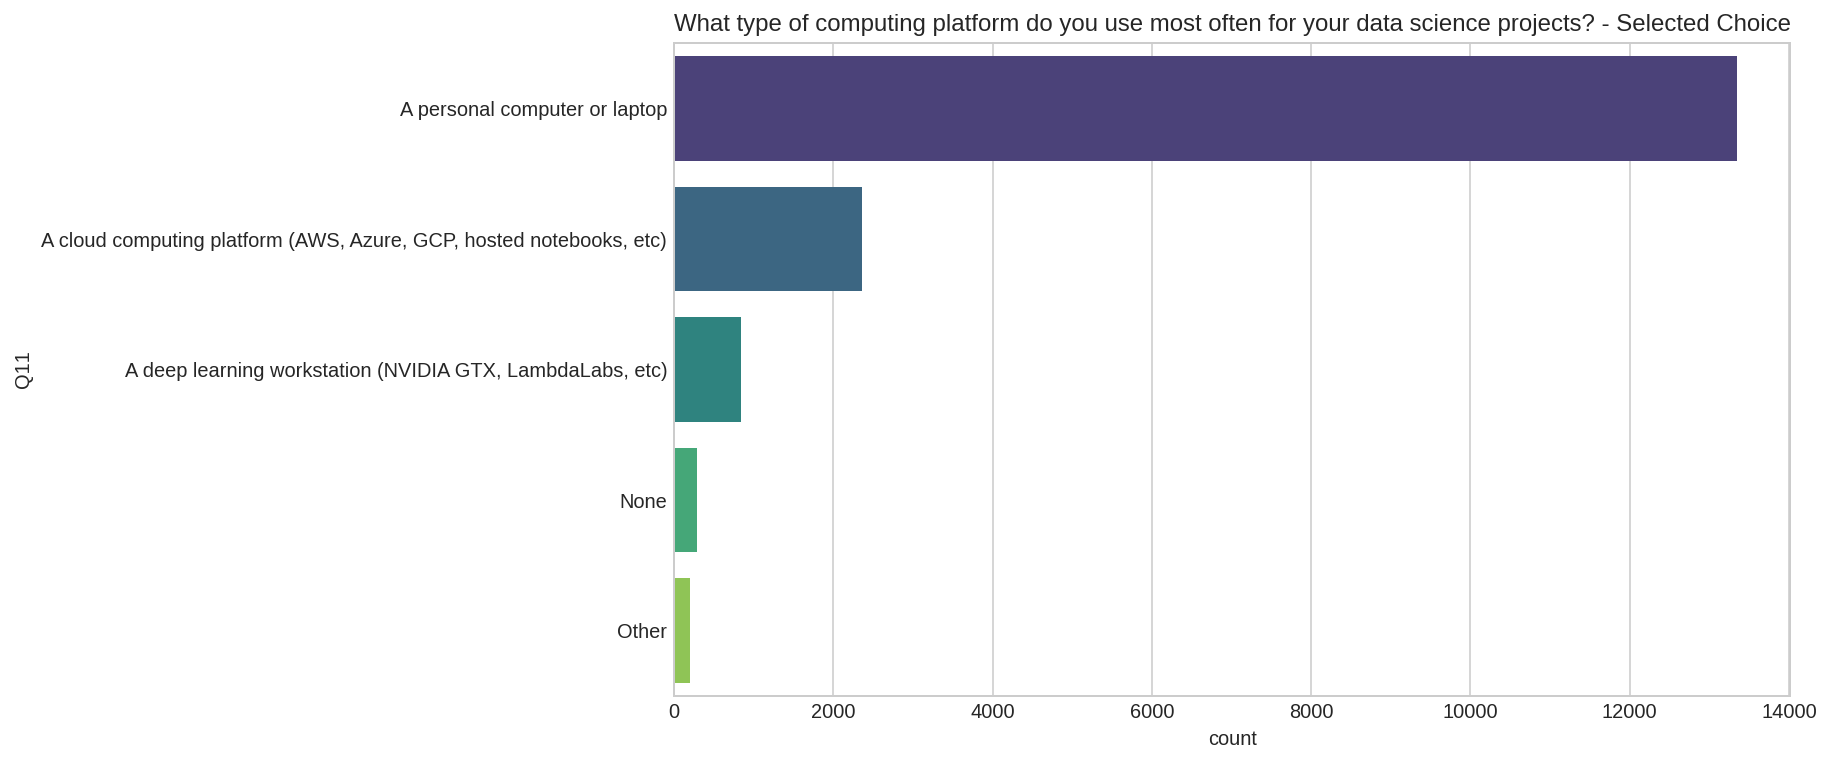

In [204]:
plot_by_qno("Q11")

프로젝트에 주로 사용하는 플랫폼은??


개인컴퓨트 클라우드 플랫폼, 딥러닝 워크스테이선 등이 잉ㅆ음

In [203]:
question_title_qno("Q11")

'What type of computing platform do you use most often for your data science projects? - Selected Choice'

인도 사용자가 엄청 많구려유

q4: 학위 석사학위가장 많고 다음으로 학사

q5: 지금 현재 직업 학생 데이터사이언티스트, 소트으웨어 엔지니어, 

q6: 코드를 쓴지 얼마나 되었나?? 3~5년 가장 많다!!

아예 없는 사람들도 많아요오

